![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [5]:
bikes.groupby('workingday').total.describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [7]:
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


Se observa que en promedio la cantidad de bicicletas que se renta por hora, en un dia de trabajo o en un dia no laboral, son aproximadamente parecidas y con una desviacion similar. Al observar la distribucion de las bicicletas rentadas por horas, ambas tiene un minimo de 1 bicicleta rentada, pero el rango de las bicicletas en un dia laboral es por poco mas amplio que el de un dia no laboral. 

Por otro lado la districucion de la cantidad de biciletas alquiladas por frana horaria, se observa que en promedio en la hora en que menos bicicletas se alquina es al rededor de las 4 de la mañana, asi mismo, en las horas de la media noche y madrugada, entre las 11 y las 6 de la mañana en promedio no se alquilan mas de 11 bicicletas. Por el otro lado, las horas en que en promedio se alquilan mas bicicletas son en la franja de las 4 a las 7 de la noche, y a las 8 de la mañana. 

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

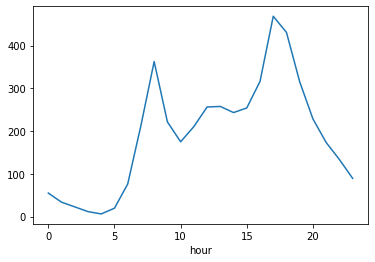

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

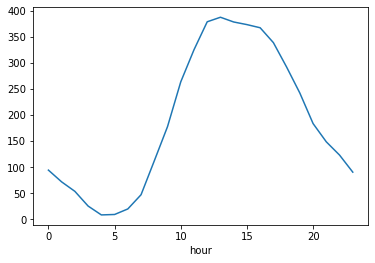

In [9]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes[bikes['workingday']==0].groupby('hour').total.mean().plot()

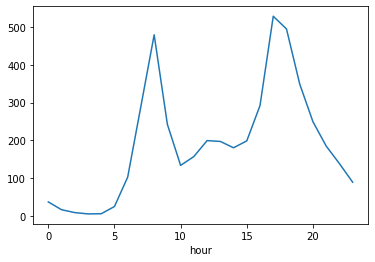

In [10]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes[bikes['workingday']==1].groupby('hour').total.mean().plot()

Se observa un comportamiento diferente en el promedio de rentas realizadas en cada franja de horario, pependiendo si es un dia laboral o no laboral. En el caso de un dia laboral, se observa dos picos en la cantidad de bicicletas rentadas promedio, podria deberse a que son las horas en que mas transitan personas desde sus cas al trabajo, y viserversa. En el caso de los dias no laborales, existe un aumento progresivo en la cantidad de bicicletas rentadas por hora, hasta alcanzar un punto maximo entre las 12 y las 4 de la trade, donde vuelve a desender la cantdiad promedio de bicicletas. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [50]:
# Celda 3
X = bikes[['hour', 'workingday']]
y = bikes['total']

# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

print('Los coeficientes son:')
print(model_lr.coef_)

Los coeficientes son:
[10.49362402  5.20940956]


In [51]:
y_pred_lr = model_lr.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr, squared=False)))

MSE: 28836.873764796863
RMSE: 13.031279027949875


Por cada hora adicional en el dia, es decir a medida que va transcurriendo el dia, la cantidad de bicicletas que se rentan en cada franja aumenta aprox 10 unidades. Por otro lado, la cantidad de bicicletas que se rentan aumenta aprox 5 unidades si es un dia laboral. 
No se obtiene un valor de intercepto, que me permite conocer que pasa cuando esta en la franja de hora 0 y en un dia no laboral. La limitacion que se observa en este caso es que la variable horas del dia si bien es una variable continua, se asumiria como una variable ordinal, y para el modelo de regresion se obtendria asi no 1 sino 23 coeficientes, lo que puede volver bastante complejod e explicar el modelo. 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [52]:
# Celda 4

from sklearn.metrics import mean_squared_error

# Definición de parámetros y criterios de parada
max_depth = 6
num_pct = 10
max_features = None
min_gain=0.001


# Definición de la función best_split para calcular cuál es la mejor variable y punto de corte para hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 1000000000]  # j, split, mse
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            filter_l = X.iloc[:, j] < split
            y_l = y.loc[filter_l]
            y_r = y.loc[~filter_l]
            yprom_l = [y_l.mean() for i in range(y_l.shape[0])]
            yprom_r = [y_r.mean() for i in range(y_r.shape[0])]
    
            mse_l = mean_squared_error(y_l.values, yprom_l)
            mse_r = mean_squared_error(y_r.values, yprom_r)
            mse = mse_l + mse_r
                        
            if mse < best_split[2]:
                best_split = [j, split, mse]
    
    return best_split

j, split, gain = best_split(X_train, y_train, 10)
j, split, gain

(0, 6.0, 31815.20708908624)

In [53]:
def tree_grow(X, y, level=0, max_gain=100000, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], level=level, split=-1, n_samples=1, mse=0)
        return tree
    
    # Calcular la mejor división
    j, split, mse = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean()) 
    
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], mse=mse)
    # Revisar el criterio de parada 
    if mse > max_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, max_gain=max_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, max_gain=max_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree


# Aplicación de la función tree_grow
tree = tree_grow(X_train, y_train, level=0, max_gain=1000000, max_depth=6, num_pct=10)
tree

{'y_pred': 189,
 'level': 0,
 'split': [0, 6.0],
 'n_samples': 8164,
 'mse': 31815.20708908624,
 'sl': {'y_pred': 25,
  'level': 1,
  'split': [0, 5.0],
  'n_samples': 2043,
  'mse': 1286.0759833179525,
  'sl': {'y_pred': 26,
   'level': 2,
   'split': [0, 4.0],
   'n_samples': 1697,
   'mse': 1300.4772516879634,
   'sl': {'y_pred': 31,
    'level': 3,
    'split': [0, 3.0],
    'n_samples': 1341,
    'mse': 1613.8755374352654,
    'sl': {'y_pred': 37,
     'level': 4,
     'split': [1, 1.0],
     'n_samples': 1024,
     'mse': 2121.8561402149517,
     'sl': {'y_pred': 73,
      'level': 5,
      'split': [0, 2.0],
      'n_samples': 329,
      'mse': 2446.071797648036,
      'sl': {'y_pred': 85,
       'level': 6,
       'split': -1,
       'n_samples': 211,
       'mse': 3437.129396120445},
      'sr': {'y_pred': 53,
       'level': 6,
       'split': -1,
       'n_samples': 118,
       'mse': 1000000000}},
     'sr': {'y_pred': 20,
      'level': 5,
      'split': [0, 2.0],
      'n

In [54]:
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted



# Ejecución de función tree_predict
tree_predict(X_test, tree)

array([241.,   8., 316., ...,  24.,  27.,  53.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Accuracy:  (0.6456864550300455, 7)
R2:  (0.6512896280920657, 20)
MSE:  (11497.64983417248, 7)


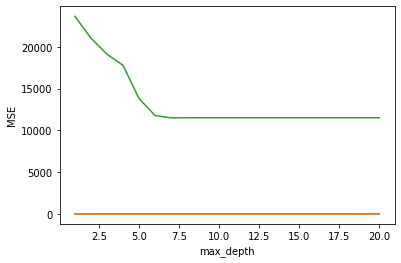

In [55]:
# Celda 5
X = bikes[['hour', 'workingday']]
y = bikes['total']

max_depth_range = range(1, 21)
accuracy_scores = []
r2 = []
mse = []

for depth in max_depth_range:
    model_dt = DecisionTreeRegressor(max_depth=depth)
    accuracy_scores.append(cross_val_score(model_dt, X_train, y_train, cv=10).mean())
    model_dt.fit(X_train, y_train)
    y_predict = model_dt.predict(X_test)
    mse.append(mean_squared_error(y_test, y_predict))
    r2.append(model_dt.score(X_train, y_train))


plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

print('Accuracy: ', sorted(zip(accuracy_scores, max_depth_range))[::-1][0])

plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2')

print('R2: ', sorted(zip(r2, max_depth_range))[::-1][0])


plt.plot(max_depth_range, mse)
plt.xlabel('max_depth')
plt.ylabel('MSE')

print('MSE: ', sorted(zip(mse, max_depth_range))[::1][0])

In [56]:
model_dt = DecisionTreeRegressor(max_depth=7, random_state=1)
model_dt.fit(X_train, y_train)
print(model_dt.score(X_train, y_train))

# Impresión de resultados de desemepeño del árbol de decisión

y_predict_dt = model_dt.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_predict_dt))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predict_dt, squared=False)))

0.6506536740794227
MSE: 11497.64983417248
RMSE: 10.355051650429948


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [3]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [4]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [5]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [6]:
# Celda 6
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## Arbol de Decision
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())
    
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
print(sorted(zip(accuracy_scores, max_depth_range))[::-1][0])
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)
y_preddc = clf.predict(X_test)

print('f1_score: %f, accuracy: %f' % (metrics.f1_score(y_test,y_preddc), metrics.accuracy_score(y_test,y_preddc)))

(0.6308888888888888, 2)
f1_score: 0.644860, accuracy: 0.645333


In [7]:
# Definicion de Regresion Logistica 
mlr = LogisticRegression()
mlr.fit(X_train, y_train)
y_predlr = mlr.predict(X_test)


print('f1_score: %f, accuracy: %f' % (metrics.f1_score(y_test,y_predlr), metrics.accuracy_score(y_test,y_predlr)))

f1_score: 0.612492, accuracy: 0.615333


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [11]:
# Celda 7
# Uso de BaggingRegressor de la libreria (sklearn) donde se usa el modelo BaggingClassifier como estimador
from sklearn.ensemble import BaggingClassifier


### 100 árboles de decisión donde max_depth = None
bag_dt = BaggingClassifier(DecisionTreeClassifier(max_depth=None), n_estimators=100, 
                          bootstrap=True, oob_score=True, random_state=1, max_samples = 300)

# Entrenemiento del modelo con set de entrenamiento y predicción en el set de test
bag_dt.fit(X_train, y_train)
y_pred_dt = bag_dt.predict(X_test)

# Cálculo del  Accuracy y F1-Score del modelo
print('100 árboles de decisión donde max_depth = None \n f1_score: %f, accuracy: %f' % (metrics.f1_score(y_test,y_pred_dt), 
                                                                                        metrics.accuracy_score(y_test,y_pred_dt)))




### 100 árboles de decisión donde max_depth = 2
bag_dt2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, 
                            bootstrap=True, oob_score=True, random_state=1, max_samples = 300)

# Entrenemiento del modelo con set de entrenamiento y predicción en el set de test
bag_dt2.fit(X_train, y_train)
y_pred_dt2 = bag_dt2.predict(X_test)

# Cálculo del  Accuracy y F1-Score del modelo
print('\n \n 100 árboles de decisión donde max_depth = 2 \n f1_score: %f, accuracy: %f' % (metrics.f1_score(y_test,y_pred_dt2), 
                                                                                           metrics.accuracy_score(y_test,y_pred_dt2)))






### 100 regresiones logísticas
bag_rl = BaggingClassifier(LogisticRegression(), n_estimators=100, 
                           bootstrap=True, oob_score=True, random_state=1, max_samples = 300)

# Entrenemiento del modelo con set de entrenamiento y predicción en el set de test
bag_rl.fit(X_train, y_train)
y_pred_rl = bag_rl.predict(X_test)

# Cálculo del  Accuracy y F1-Score del modelo
print('\n \n 100 regresiones logísticas \n f1_score: %f, accuracy: %f' % (metrics.f1_score(y_test,y_pred_rl), 
                                                                          metrics.accuracy_score(y_test,y_pred_rl)))

100 árboles de decisión donde max_depth = None 
 f1_score: 0.669780, accuracy: 0.670000

 
 100 árboles de decisión donde max_depth = 2 
 f1_score: 0.649051, accuracy: 0.654667

 
 100 regresiones logísticas 
 f1_score: 0.606143, accuracy: 0.615333


In [12]:
# Creación de 300 muestras de bootstrap
n_estimators = 100
n_muestras = 300
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_muestras)]



# Entrenamiento de 100 árboles de decisión donde max_depth = None
trees_dc = {}
for i in range(n_muestras):
    trees_dc[i] = DecisionTreeClassifier(max_depth=None, random_state=123)
    trees_dc[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
# Predicción para los datos del set de test con cada modelo
y_preddc_df = pd.DataFrame(index=X_test.index, columns=list(range(n_muestras)))
for i in range(n_muestras):
    y_preddc_df.iloc[:, i] = trees_dc[i].predict(X_test)

# Votación mayoritaria
y_preddc = (y_preddc_df.sum(axis=1) >= (n_muestras / 2)).astype(np.int)

# Cálculo del  Accuracy y F1-Score del modelo
print('100 árboles de decisión donde max_depth = None \n f1_score: %f, accuracy: %f' % (metrics.f1_score(y_preddc, y_test), 
                                                                                        metrics.accuracy_score(y_preddc, y_test)))





# Entrenamiento de 100 árboles de decisión donde max_depth = 2
trees_dc2 = {}
for i in range(n_muestras):
    trees_dc2[i] = DecisionTreeClassifier(max_depth=2, random_state=123)
    trees_dc2[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
# Predicción para los datos del set de test con cada modelo
y_preddc2_df = pd.DataFrame(index=X_test.index, columns=list(range(n_muestras)))
for i in range(n_muestras):
    y_preddc2_df.iloc[:, i] = trees_dc2[i].predict(X_test)

# Votación mayoritaria
y_preddc2 = (y_preddc2_df.sum(axis=1) >= (n_muestras / 2)).astype(np.int)

# Cálculo del  Accuracy y F1-Score del modelo
print('\n \n 100 árboles de decisión donde max_depth = 2 \n f1_score: %f, accuracy: %f' % (metrics.f1_score(y_preddc2, y_test), 
                                                                                        metrics.accuracy_score(y_preddc2, y_test)))



# Entrenamiento 100 regresiones logísticas
trees_lr = {}
for i in range(n_muestras):
    trees_lr[i] = LogisticRegression()
    trees_lr[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
    
# Predicción para los datos del set de test con cada modelo
y_predlr_df = pd.DataFrame(index=X_test.index, columns=list(range(n_muestras)))
for i in range(n_muestras):
    y_predlr_df.iloc[:, i] = trees_lr[i].predict(X_test)

# Votación mayoritaria
y_predlr = (y_predlr_df.sum(axis=1) >= (n_muestras / 2)).astype(np.int)

# Cálculo del  Accuracy y F1-Score del modelo
print('\n \n 100 regresiones logísticas \n f1_score: %f, accuracy: %f' % (metrics.f1_score(y_predlr, y_test), 
                                                                          metrics.accuracy_score(y_predlr, y_test)))



100 árboles de decisión donde max_depth = None 
 f1_score: 0.659794, accuracy: 0.648000

 
 100 árboles de decisión donde max_depth = 2 
 f1_score: 0.644860, accuracy: 0.645333

 
 100 regresiones logísticas 
 f1_score: 0.612576, accuracy: 0.618000


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [13]:
# Celda 8

### 100 árboles de decisión donde max_depth = None
bag_dt = BaggingClassifier(DecisionTreeClassifier(max_depth=None), n_estimators=100, 
                          bootstrap=True, oob_score=True, random_state=1, max_samples = 300)

# Entrenemiento del modelo con set de entrenamiento y predicción en el set de test
bag_dt.fit(X_train, y_train)
y_pred_dt = bag_dt.predict(X_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors_dt = np.zeros(bag_dt.n_estimators)
y_pred_dt_all_ = np.zeros((X_test.shape[0], bag_dt.n_estimators))

for i in range(bag_dt.n_estimators):
    oob_sample = ~bag_dt.estimators_samples_[i]
    y_pred_dt_ = bag_dt.estimators_[i].predict(X_train.values[oob_sample])
    errors_dt[i] = metrics.accuracy_score(y_pred_dt_, y_train.values[oob_sample])
    y_pred_dt_all_[:, i] = bag_dt.estimators_[i].predict(X_test)
    
alpha_dt = (1 - errors_dt) / (1 - errors_dt).sum()
y_pred_dt = (np.sum(y_pred_dt_all_ * alpha_dt, axis=1) >= 0.5).astype(np.int)

# Cálculo del  Accuracy y F1-Score del modelo
print('100 árboles de decisión donde max_depth = None \n f1_score: %f, accuracy: %f' % (metrics.f1_score(y_test,y_pred_dt), 
                                                                                        metrics.accuracy_score(y_test,y_pred_dt)))





### 100 árboles de decisión donde max_depth = 2
bag_dt2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, 
                            bootstrap=True, oob_score=True, random_state=1, max_samples = 300)

# Entrenemiento del modelo con set de entrenamiento y predicción en el set de test
bag_dt2.fit(X_train, y_train)
y_pred_dt2 = bag_dt2.predict(X_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors_dt2 = np.zeros(bag_dt2.n_estimators)
y_pred_dt2_all_ = np.zeros((X_test.shape[0], bag_dt2.n_estimators))

for i in range(bag_dt2.n_estimators):
    oob_sample = ~bag_dt2.estimators_samples_[i]
    y_pred_dt2_ = bag_dt2.estimators_[i].predict(X_train.values[oob_sample])
    errors_dt2[i] = metrics.accuracy_score(y_pred_dt2_, y_train.values[oob_sample])
    y_pred_dt2_all_[:, i] = bag_dt2.estimators_[i].predict(X_test)
    
alpha_dt2 = (1 - errors_dt2) / (1 - errors_dt2).sum()
y_pred_dt2 = (np.sum(y_pred_dt2_all_ * alpha_dt2, axis=1) >= 0.5).astype(np.int)

# Cálculo del  Accuracy y F1-Score del modelo
print('\n \n 100 árboles de decisión donde max_depth = 2 \n f1_score: %f, accuracy: %f' % (metrics.f1_score(y_test,y_pred_dt2), 
                                                                                           metrics.accuracy_score(y_test,y_pred_dt2)))






### 100 regresiones logísticas
bag_rl = BaggingClassifier(LogisticRegression(), n_estimators=100, 
                           bootstrap=True, oob_score=True, random_state=1, max_samples = 300)

# Entrenemiento del modelo con set de entrenamiento y predicción en el set de test
bag_rl.fit(X_train, y_train)
y_pred_rl = bag_rl.predict(X_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors_rl = np.zeros(bag_rl.n_estimators)
y_pred_rl_all_ = np.zeros((X_test.shape[0], bag_rl.n_estimators))

for i in range(bag_rl.n_estimators):
    oob_sample = ~bag_rl.estimators_samples_[i]
    y_pred_rl_ = bag_rl.estimators_[i].predict(X_train.values[oob_sample])
    errors_rl[i] = metrics.accuracy_score(y_pred_rl_, y_train.values[oob_sample])
    y_pred_rl_all_[:, i] = bag_rl.estimators_[i].predict(X_test)
    
alpha_rl = (1 - errors_rl) / (1 - errors_rl).sum()
y_pred_rl = (np.sum(y_pred_rl_all_ * alpha_rl, axis=1) >= 0.5).astype(np.int)


# Cálculo del  Accuracy y F1-Score del modelo
print('\n \n 100 regresiones logísticas \n f1_score: %f, accuracy: %f' % (metrics.f1_score(y_test,y_pred_rl), 
                                                                          metrics.accuracy_score(y_test,y_pred_rl)))


100 árboles de decisión donde max_depth = None 
 f1_score: 0.672402, accuracy: 0.670000

 
 100 árboles de decisión donde max_depth = 2 
 f1_score: 0.644505, accuracy: 0.650667

 
 100 regresiones logísticas 
 f1_score: 0.605730, accuracy: 0.614667


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [15]:
# Celda 9
En el caso de hacer un esamble de arboles sin calibrar ningun parametro, se observa que con votación ponderada existe una mejoria en el desempeño de los modelos. Para el caso de un ensamble de arboles con maxima profundidad 2 y de una regresion logistica, la mejor metodologia es por votacion mayoritaria. Sin embargo cabe destacar que no se ve una diferencia notoria en el desempeño de los modelos usados, ni entre los tipos de modelos usados: Arboles de Desicion o Regresion Logistica, ni en la metodologia de votacion mayoritaria o ponderada. 

SyntaxError: invalid syntax (<ipython-input-15-5e0e30accd7c>, line 2)